In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [3]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [4]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [5]:
# np.random.shuffle(trend_dfs)

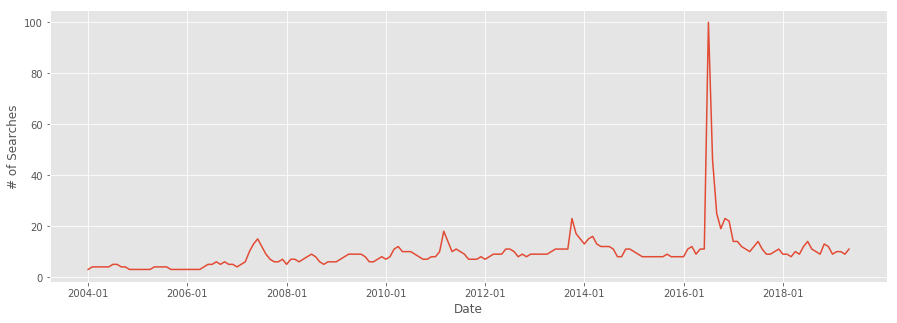

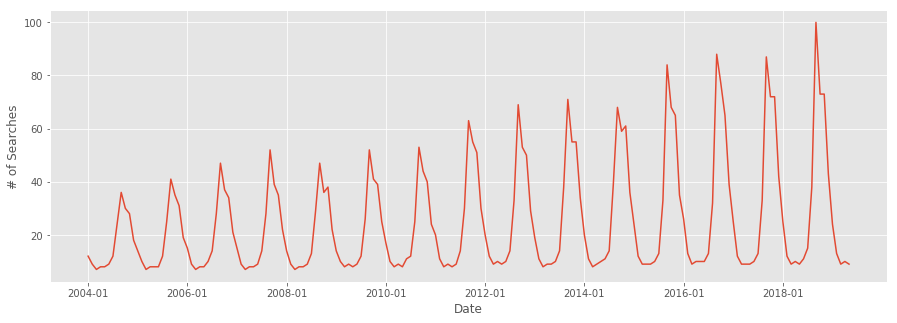

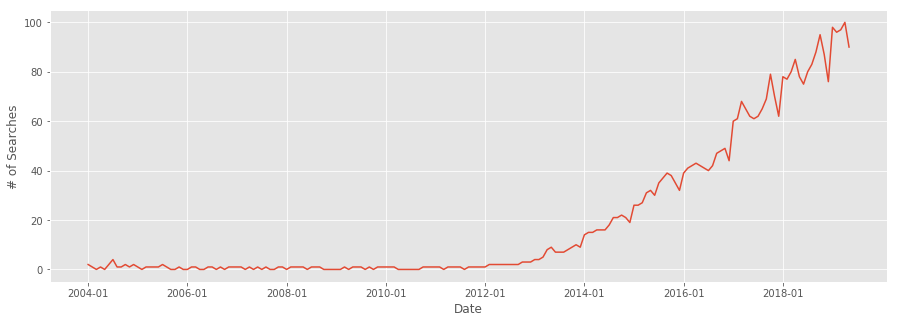

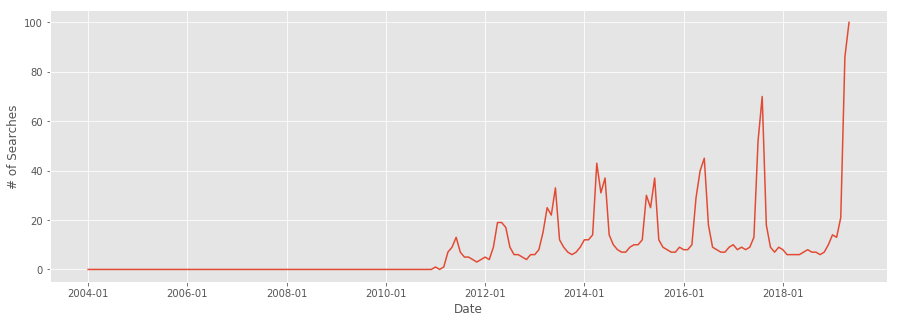

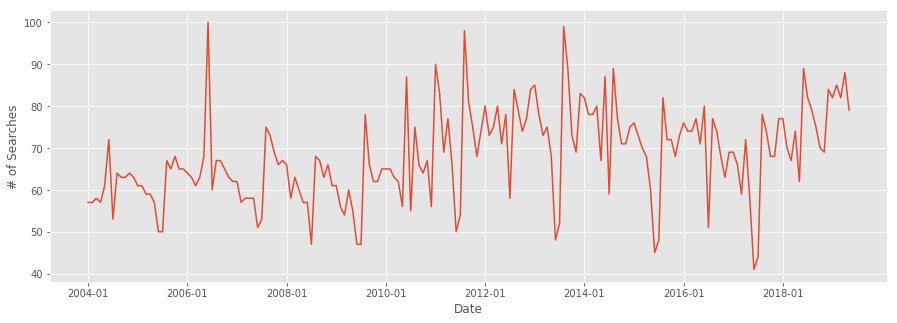

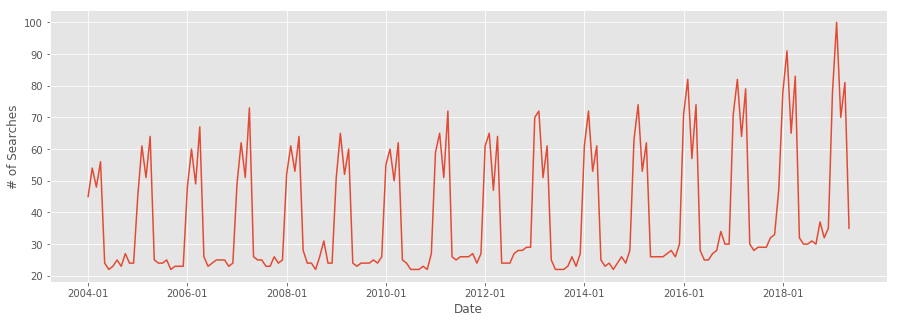

In [6]:
plt.style.use('ggplot')
for trend in trend_dfs:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(trend.index, trend['values'])
    ax.set_title
    ticks = ax.get_xticks()
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])
    ax.set_xlabel('Date')
    ax.set_ylabel('# of Searches')
    

In [15]:
taxes_df = trend_dfs[-1]

In [16]:
taxes_df.head()

,values
2004-01,45
2004-02,54
2004-03,48
2004-04,56
2004-05,24


In [17]:
taxes_df['index'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['index'] % 12

In [18]:
taxes_df.tail()

,values,index,month
2019-01,78,180,0
2019-02,100,181,1
2019-03,70,182,2
2019-04,81,183,3
2019-05,35,184,4


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(taxes_df[['index']], taxes_df['values'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
trend_line = lr.predict(taxes_df[['index']])

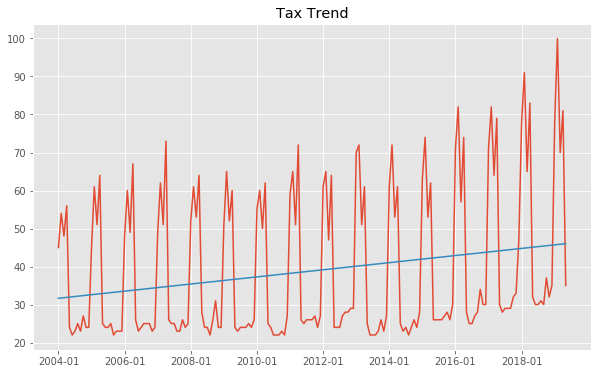

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(taxes_df.index, taxes_df['values'], label='data')
ax.plot(taxes_df.index, trend_line, label='trend')
ax.set_title('Tax Trend')
ticks = ax.get_xticks()
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()